In [118]:
from fileinput import filename
import os
import cv2
import tensorflow as tf
import numpy as np

In [119]:
training_labels = os.listdir(path='/Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train')
training_labels.remove('.DS_Store')
print('Total word count:',len(training_labels))
print(training_labels)

Total word count: 74
['肉鬆', '意大利', '果汁', '酒精', '夾心餡餅', '朱古力', '泡芙', '合味道', '花生', '果仁', '薄荷糖', '白酒', '奶茶', '齋燒鵝', '糖果', '洗衣', '餅乾', '脆豆', '消毒', '脆片', '凍乾水果', '米通 米餅', '咖啡', '汽水', '手套', '穀物棒 能量棒', '威士忌', '曲奇餅', '地板', '牛奶', '麵類小食', '啫喱', '紫菜', '肉乾', '粟米片 粟米條', '啤酒', '牛奶朱古力', '豆奶', '穀物', '韓國', '小食', '蜜糖', '蛋糕', '高鈣', '貓糧', '寵物乾糧', '威化餅', '多用途', '日本', '衛生紙', '爆谷', '果乾', '珍寶珠 波板糖', '家居清潔', '布甸', '蛋卷', '乾果', '粟米', '蜂蜜', '蒟蒻', '米粉', '提子', '薯片', '忌廉', '咖喱', '胡椒', '口香糖', '和菓子', '魚乾 魚條 魚肉腸', '爆炸糖', '麵', '蝦片 蝦條 薯片', '泉水', '魷魚絲']


In [120]:
import shutil
for folderName in training_labels:
    folderPath = '/Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/'+folderName
    fileList = os.listdir(folderPath)
    if len(fileList)< 35:
        shutil.rmtree(folderPath)
    print({folderName:str(len(fileList))+' files'})
    

{'肉鬆': '83 files'}
{'意大利': '133 files'}
{'果汁': '245 files'}
{'酒精': '71 files'}
{'夾心餡餅': '45 files'}
{'朱古力': '490 files'}
{'泡芙': '51 files'}
{'合味道': '39 files'}
{'花生': '168 files'}
{'果仁': '293 files'}
{'薄荷糖': '79 files'}
{'白酒': '201 files'}
{'奶茶': '35 files'}
{'齋燒鵝': '49 files'}
{'糖果': '448 files'}
{'洗衣': '567 files'}
{'餅乾': '437 files'}
{'脆豆': '51 files'}
{'消毒': '383 files'}
{'脆片': '74 files'}
{'凍乾水果': '45 files'}
{'米通 米餅': '37 files'}
{'咖啡': '462 files'}
{'汽水': '107 files'}
{'手套': '61 files'}
{'穀物棒 能量棒': '50 files'}
{'威士忌': '131 files'}
{'曲奇餅': '221 files'}
{'地板': '35 files'}
{'牛奶': '156 files'}
{'麵類小食': '46 files'}
{'啫喱': '158 files'}
{'紫菜': '193 files'}
{'肉乾': '206 files'}
{'粟米片 粟米條': '36 files'}
{'啤酒': '374 files'}
{'牛奶朱古力': '40 files'}
{'豆奶': '135 files'}
{'穀物': '69 files'}
{'韓國': '43 files'}
{'小食': '53 files'}
{'蜜糖': '45 files'}
{'蛋糕': '222 files'}
{'高鈣': '57 files'}
{'貓糧': '125 files'}
{'寵物乾糧': '48 files'}
{'威化餅': '56 files'}
{'多用途': '35 files'}
{'日本': '390 files'}
{'衛生紙': '119 

In [121]:



def load_data_as_arr(mode:str, image_size:int,training_labels):
    
    # classes = ['其他','堅果','朱古力,糖果,香口膠','脆片,薯片','餅乾']
    # classes = training_labels
    
    dataset_path = os.path.join('/Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset',mode)
    image_list =[]
    label_list =[]
    # image_to_label_list = []

    for idx, c in enumerate(training_labels):
        class_dir_path = os.path.join(dataset_path, c)
        for filename in os.listdir(class_dir_path):
            if not filename.endswith('.jpg'):
                continue
            filepath = os.path.join(class_dir_path,filename)
            print(f'[INFO] processing {filepath}')
            img = cv2.imread(filepath)
            try:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            except:
                continue
            img = cv2.resize(img, (image_size,image_size))
            image_list.append(img)
            label_list.append(idx)

    print(f'[INFO] processed all images')
    return np.array(image_list), np.array(label_list)

In [122]:
image_size = 160
train_images, train_labels = load_data_as_arr('train', image_size,training_labels)
# test_images, test_labels = load_data_as_arr('test', image_size)

print(f'[INFO] {train_images.shape=}')
print(f'[INFO] {train_labels.shape=}')
# print(f'[INFO] {test_images.shape=}')
# print(f'[INFO] {test_labels.shape=}')

[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/零食天地 - 泰妹 Nai Pramong 鹹蛋三文魚皮 125g.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/黑橋牌 - 特製肉酥（大罐）270g｜台灣熱賣｜台灣.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/零食天地 - 【1罐裝】【泰國新鮮直送】皇牌鮮肉鬆蝦片 (90g)｜新舊包裝隨機送貨   #零食 #百貨 #口罩 #3M.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/精選零食 - CENTURY-W-H香脆豆-什錦果仁 ( 20小鋁袋).jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/零食大王 - 泰國原味肉鬆蛋卷 250g x 2盒 (8850644001312_2).jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/華園 - 2包辣味紅燒魚柳(30gX2) 香港零食 兒時味道 伴手禮 手信.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/肉鬆/零食天地 - 【1包裝】泰國 Aroi Coconut Crispy Rolls 紫薯味脆卷 (80g).jpg
[INFO] process

Premature end of JPEG file


[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/法國碎朱古力馬德蓮貝殼蛋糕獨立包裝.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/朱古力-可口可樂 - 咖啡汽水-朱古力 - 330MLX4.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/黑朱古力盒裝.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/特醇86%黑朱古力(排裝).jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/ChocZero - 85%無糖黑朱古力塊 (無糖、無麩質、純素、非基因改造、低碳).jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/朱古力-丹麥藍罐 - 朱古力曲奇 (包裝) - 50G.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/朱古力-桂格 - 即沖燕麥飲品-朱古力味 - 33GX5.jpg
[INFO] processing /Users/aaadragon/Desktop/sup-price/AI_dataset/Product_label_dataset/train/朱古力/Well Naturally - 無糖杏仁黑朱古力 x 2包 (生酮,

In [123]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels))



In [124]:
def format_example(image,label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    return image,label

In [125]:
BATCH_SIZE = 30
SHUFFLE_BUFFER_SIZE = 50
train_dataset = train_dataset.map(format_example).shuffle(SHUFFLE_BUFFER_SIZE)
# train_dataset = train_dataset.map(format_example)
# test = test_dataset.map(format_example)

In [126]:
train_size = int(0.9 * len(train_dataset))
train = train_dataset.take(train_size)
validation = train_dataset.skip(train_size)
print(f'[INFO] train dataset length: {len(train)}')
print(f'[INFO] valid dataset length: {len(validation)}')

[INFO] train dataset length: 8728
[INFO] valid dataset length: 970


In [127]:
train_batches = train.batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
# test_batches = test.batch(BATCH_SIZE)


In [128]:
IMG_SHAPE = (image_size, image_size, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                include_top=False,
                                                weights='imagenet')

In [129]:
base_model.trainable = False

In [140]:
train_batches

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int64)>

In [130]:
image_batch, label_batch = next(iter(train_batches.take(1)))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(30, 5, 5, 1280)


In [131]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(30, 1280)


In [ ]:
training_labels

In [132]:
prediction_layer = tf.keras.layers.Dense(len(training_labels))
prediction_batch = prediction_layer(feature_batch)
print(prediction_batch.shape)

(30, 5, 5, 74)


In [133]:
x = base_model.output;
x = global_average_layer(x)
x = prediction_layer(x)

model = tf.keras.Model(inputs=base_model.input,outputs=x)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

In [134]:
base_learning_rate = 0.004
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
                                                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                    metrics=['accuracy'])

model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

In [135]:
initial_epochs=20
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps=validation_steps)
print('initial loss: {:.2f}'.format(loss0))
print('initial accuracy: {:.2f}'.format(accuracy0))

20/20 [==============================] - 5s 123ms/step - loss: 5.4129 - accuracy: 0.0000e+00
initial loss: 5.41
initial accuracy: 0.00


In [136]:
history = model.fit(
        train_batches,
        epochs = initial_epochs,
        validation_data=validation_batches
)

Epoch 1/20
291/291 [==============================] - 36s 120ms/step - loss: 2.5417 - accuracy: 0.6868 - val_loss: 17.1369 - val_accuracy: 0.2340
Epoch 2/20
291/291 [==============================] - 35s 122ms/step - loss: 2.2431 - accuracy: 0.7154 - val_loss: 17.5282 - val_accuracy: 0.2309
Epoch 3/20
291/291 [==============================] - 39s 132ms/step - loss: 1.8814 - accuracy: 0.7502 - val_loss: 17.4675 - val_accuracy: 0.2340
Epoch 4/20
291/291 [==============================] - 40s 137ms/step - loss: 1.7348 - accuracy: 0.7594 - val_loss: 17.2096 - val_accuracy: 0.2340
Epoch 5/20
291/291 [==============================] - 41s 140ms/step - loss: 1.5833 - accuracy: 0.7701 - val_loss: 16.7954 - val_accuracy: 0.2320
Epoch 6/20
291/291 [==============================] - 39s 132ms/step - loss: 1.5250 - accuracy: 0.7731 - val_loss: 18.0326 - val_accuracy: 0.2320
Epoch 7/20
291/291 [==============================] - 37s 129ms/step - loss: 1.5401 - accuracy: 0.7833 - val_loss: 18.5403 -

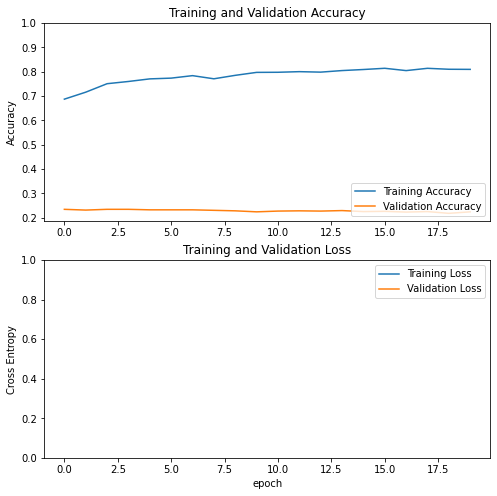

In [137]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [138]:
model.save('./recognition_label_model',overwrite=True);

INFO:tensorflow:Assets written to: ./recognition_label_model/assets
